## Import Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
from deepface import DeepFace
import cv2

## DeepFace Method

In [2]:
# Define the backends and alignment modes
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'fastmtcnn',
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'centerface',
]

alignment_modes = [True, False]

In [7]:
# Path to the image
img_path = 'D:\Projects\Facial-Expression-Recognition\Code\images\img1.jpg'

In [8]:
# Analyze the image using DeepFace
demographies = DeepFace.analyze(
    img_path=img_path,
    detector_backend=backends[5],  
    align=alignment_modes[0],      
    actions=['emotion'],           
)

demographies

[{'emotion': {'angry': 97.98104763031006,
   'disgust': 1.7930233851075172,
   'fear': 0.008298271131934598,
   'happy': 0.0031130635761655867,
   'sad': 0.18950081430375576,
   'surprise': 0.0007188555173343047,
   'neutral': 0.024303696409333497},
  'dominant_emotion': 'angry',
  'region': {'x': 185,
   'y': 87,
   'w': 108,
   'h': 169,
   'left_eye': (262, 155),
   'right_eye': (210, 153)},
  'face_confidence': 1.0}]

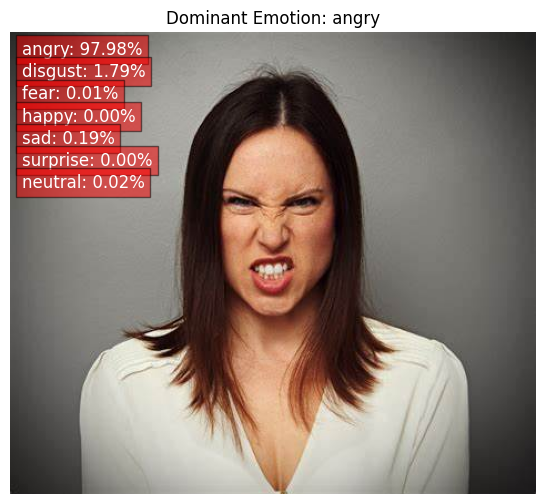

In [11]:
# Load the image using OpenCV
img = cv2.imread(img_path)

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get the emotion predictions
dominant_emotion = demographies[0]['dominant_emotion']
emotion_predictions = demographies[0]['emotion']

# Plot the image with the emotion predictions
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title(f"Dominant Emotion: {dominant_emotion}")

# Annotate the image with emotion probabilities
for emotion, score in emotion_predictions.items():
    plt.text(10, 20 + list(emotion_predictions.keys()).index(emotion) * 20, f"{emotion}: {score:.2f}%", color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
plt.show()